In [1]:
import simbench as sb
import numpy as np
import pandapower.networks as pn
from sklearn.cluster import k_means
from sklearn.metrics import calinski_harabasz_score, davies_bouldin_score
import matplotlib.pyplot as plt
import pandas as pd
import pickle

In [2]:
import matplotlib
matplotlib.matplotlib_fname()

'/home/yixuan/anaconda3/envs/py3_7_spinningup/lib/python3.7/site-packages/matplotlib/mpl-data/matplotlibrc'

In [28]:
from scipy.io import savemat

with open('typical_scenario.txt', 'rb') as file:
    t = pickle.load(file)
savemat('typical_data.mat', mdict={'typical_data': list(map(lambda x: x.to_numpy(), t))})

In [3]:
sb_code = '1-complete_data-mixed-all-2-sw'
data_net = sb.get_simbench_net(sb_code)
net = pn.case30()

/home/yixuan/anaconda3/envs/py3_7_spinningup/lib/python3.7/site-packages/simbench/converter/csv_pp_converter.py:390: FutureWarning: Index.__or__ operating as a set operation is deprecated, in the future this will be a logical operation matching Series.__or__.  Use index.union(other) instead
  idx_bus = data["Measurement"].index.difference(idx_line | idx_trafo).astype(int)
/home/yixuan/anaconda3/envs/py3_7_spinningup/lib/python3.7/site-packages/simbench/converter/csv_pp_converter.py:468: FutureWarning: Index.__or__ operating as a set operation is deprecated, in the future this will be a logical operation matching Series.__or__.  Use index.union(other) instead
  missing = csv_data["Line"].index.difference(idx_lines | idx_dclines)
/home/yixuan/anaconda3/envs/py3_7_spinningup/lib/python3.7/site-packages/simbench/converter/csv_pp_converter.py:472: FutureWarning: Index.__and__ operating as a set operation is deprecated, in the future this will be a logical operation matching Series.__and__. 

In [19]:
day_of_year = 9
data_net.profiles['renewables']['WP1'].iloc[list(range(day_of_year * 96, day_of_year * 96 + 96, 4))]

864    0.977470
868    0.979931
872    0.981144
876    0.956246
880    0.963209
884    0.920929
888    0.910445
892    0.868833
896    0.725509
900    0.606246
904    0.665836
908    0.624831
912    0.551163
916    0.404926
920    0.361570
924    0.314750
928    0.311913
932    0.267948
936    0.284890
940    0.229417
944    0.309439
948    0.562364
952    0.702353
956    0.782154
Name: WP1, dtype: float64

In [26]:
net.gen['p_mw'].sum()

165.67

In [4]:
profile_names = data_net.profiles['load'].columns.tolist()[1:]
valid_profile_names = []
for name in profile_names:
    if name[-5] == 'p' and len(name) <= 14:
        valid_profile_names.append(name[:-6])

In [5]:
PV_names = []
wind_names = []
for name in data_net.profiles['renewables'].columns.tolist()[1:]:
    if name[:2] == 'PV':
        PV_names.append(name)
    elif name[:2] == 'WP':
        wind_names.append(name)

In [6]:
net

This pandapower network includes the following parameter tables:
   - bus (30 elements)
   - load (20 elements)
   - gen (5 elements)
   - shunt (2 elements)
   - ext_grid (1 element)
   - line (41 elements)
   - poly_cost (6 elements)
   - bus_geodata (30 elements)

In [7]:
day_of_year = 365  # 0 - 365
year = 3  # 0 - 3
data_net.profiles['load'][valid_profile_names[1] + '_pload'][range(day_of_year * 96 + year, day_of_year * 96 + 96 + year, 4)].values

array([0.187872, 0.186113, 0.189496, 0.155658, 0.19464 , 0.19288 ,
       0.169193, 0.416215, 0.456822, 0.455198, 0.489036, 0.416215,
       0.465349, 0.269085, 0.169193, 0.14889 , 0.152274, 0.164185,
       0.162426, 0.126963, 0.143882, 0.170953, 0.157417, 0.142122])

In [8]:
initial_dataset = []
for year in range(0,4):
    for day_of_year in range(0,366):
        initial_dataset.append(data_net.profiles['load'][valid_profile_names[1] + '_pload'][range(day_of_year * 96 + year, day_of_year * 96 + 96 + year, 4)].values)
initial_dataset = np.array(initial_dataset)

In [9]:
initial_dataset = []
for year in range(0,4):
    for day_of_year in range(0,366):
        initial_dataset.append(data_net.profiles['renewables'][wind_names[0]][range(day_of_year * 96 + year, day_of_year * 96 + 96 + year, 4)].values)
initial_dataset = np.array(initial_dataset)

In [10]:
initial_dataset = []
for year in range(0,4):
    for day_of_year in range(0,366):
        initial_dataset.append(data_net.profiles['renewables'][PV_names[0]][range(day_of_year * 96 + year, day_of_year * 96 + 96 + year, 4)].values)
initial_dataset = np.array(initial_dataset)

In [11]:
CHI = []
for num in range(2, 20):
    centroid, labels, _ = k_means(initial_dataset, num)
    CHI.append(calinski_harabasz_score(initial_dataset, labels))



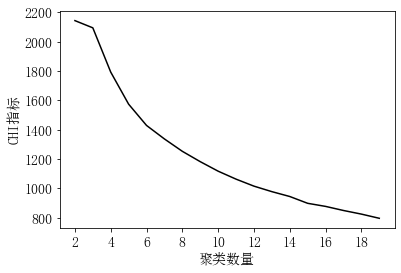

In [12]:
fig, ax = plt.subplots()
ax.plot(range(2, 20), CHI, 'k')
plt.xticks(ticks=range(2,20,2), fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel(u'聚类数量', fontsize=14)
plt.ylabel(u'CHI指标', fontsize=14)
# fig.subplots_adjust(left=0.15)
plt.savefig('（光伏）最佳聚类数', dpi=300, bbox_inches='tight')

In [11]:
num = 3

In [12]:
typical_load = {}
for name in valid_profile_names:
    initial_dataset = []
    for year in range(0,4):
        for day_of_year in range(0,366):
            initial_dataset.append(data_net.profiles['load'][name + '_pload'][range(day_of_year * 96 + year, day_of_year * 96 + 96 + year, 4)].values)
    initial_dataset = np.array(initial_dataset)
    centroid, labels, _ = k_means(initial_dataset, num)
    typical_load[name] = {'cent':centroid, 'labels':labels}

In [13]:
typical_wind = {}
for name in wind_names:
    initial_dataset = []
    for year in range(0,4):
        for day_of_year in range(0,366):
            initial_dataset.append(data_net.profiles['renewables'][name][range(day_of_year * 96 + year, day_of_year * 96 + 96 + year, 4)].values)
    initial_dataset = np.array(initial_dataset)
    centroid, labels, _ = k_means(initial_dataset, num)
    typical_wind[name] = {'cent':centroid, 'labels':labels}

In [14]:
typical_PV = {}
for name in PV_names:
    initial_dataset = []
    for year in range(0,4):
        for day_of_year in range(0,366):
            initial_dataset.append(data_net.profiles['renewables'][name][range(day_of_year * 96 + year, day_of_year * 96 + 96 + year, 4)].values)
    initial_dataset = np.array(initial_dataset)
    centroid, labels, _ = k_means(initial_dataset, num)
    typical_PV[name] = {'cent':centroid, 'labels':labels}

In [4]:
node = ['G0-A',
'G0-M',
'G1-A',
'G1-B',
'G1-C',
'G3-A',
'G3-H',
'G4-A',
'G5-A',
'L2-M',
'WP1',
'PV1',
'PV2',
'PV3',
'PV4']
        

In [192]:
random_dataset = []
for _ in range(50):
    year = np.random.choice(range(0,4))
    day_of_year = np.random.choice(range(366))
    this_scenario = {}
    for nod in node:
        if nod in ['G0-A','G0-M','G1-A','G1-B','G1-C','G3-A','G3-H','G4-A','G5-A','L2-M']:
            this_scenario[nod] = data_net.profiles['load'][nod + '_pload'][range(day_of_year * 96 + year, day_of_year * 96 + 96 + year, 4)].values
        else:
            this_scenario[nod] = data_net.profiles['renewables'][nod][range(day_of_year * 96 + year, day_of_year * 96 + 96 + year, 4)].values
        
    random_dataset.append(pd.DataFrame(this_scenario))
    

In [195]:
with open('random_scenario.txt', 'wb') as file:
    pickle.dump(random_dataset, file)
# with open('random_scenario.txt', 'rb') as file:
#     test = pickle.load(file)

In [15]:
net.ext_grid['max_p_mw'] = 800
net.ext_grid['min_p_mw'] = -400

In [16]:
net.ext_grid

bus  in_service  name  va_degree  vm_pu  max_p_mw  min_p_mw  max_q_mvar  \
0    0        True  None        0.0    1.0       800      -400       150.0   

   min_q_mvar  
0       -20.0

In [11]:
net.gen['max_p_mw'].sum() + 80

335.0

In [17]:
all_scenarios_dataset = []
year = 0
for day_of_year in range(366):
    this_scenario = {}
    for nod in node:
        if nod in ['G0-A','G0-M','G1-A','G1-B','G1-C','G3-A','G3-H','G4-A','G5-A','L2-M']:
            this_scenario[nod] = data_net.profiles['load'][nod + '_pload'][range(day_of_year * 96 + year, day_of_year * 96 + 96 + year, 4)].values
        else:
            this_scenario[nod] = data_net.profiles['renewables'][nod][range(day_of_year * 96 + year, day_of_year * 96 + 96 + year, 4)].values

    all_scenarios_dataset.append(pd.DataFrame(this_scenario))


In [19]:
with open('all_scenarios_dataset.txt', 'wb') as file:
    pickle.dump(all_scenarios_dataset, file)
# with open('random_scenario.txt', 'rb') as file:
#     test = pickle.load(file)

In [198]:
import random
random.choices([1], k=5)

[1, 1, 1, 1, 1]

/Users/alfred/Applications/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  This is separate from the ipykernel package so we can avoid doing imports until


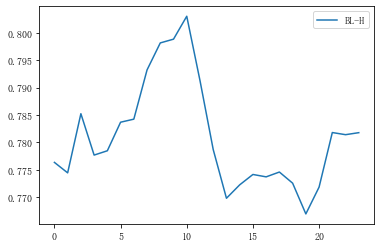

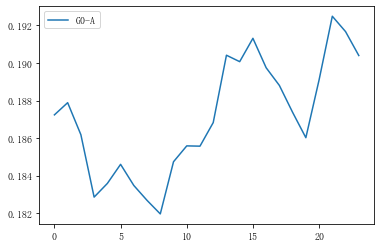

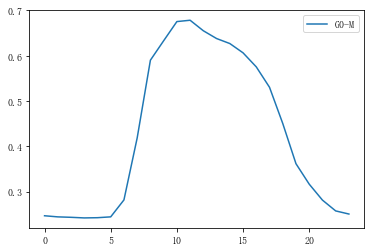

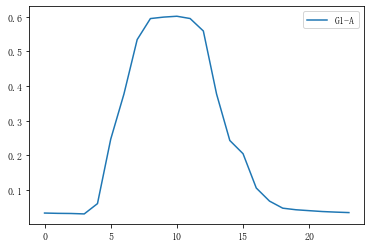

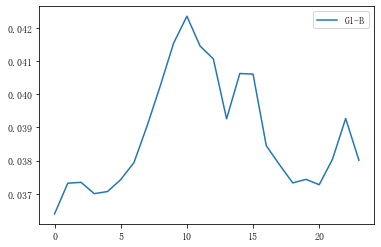

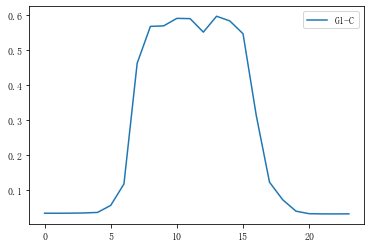

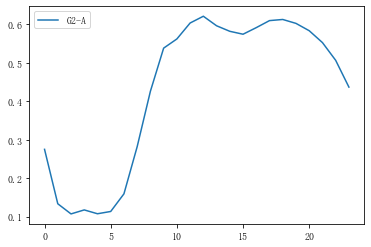

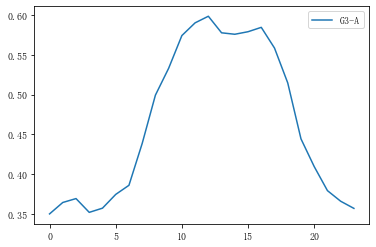

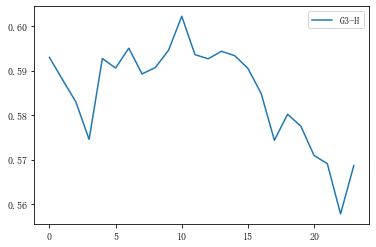

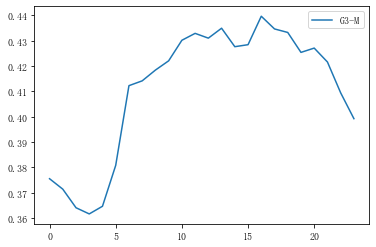

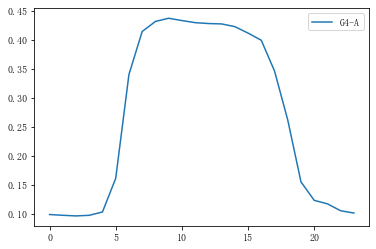

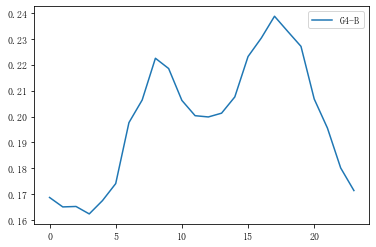

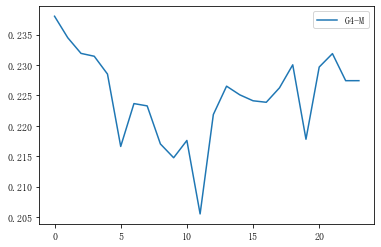

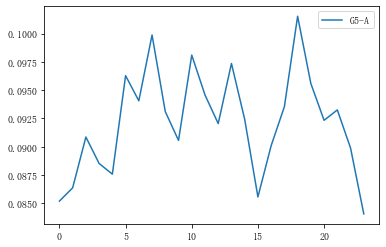

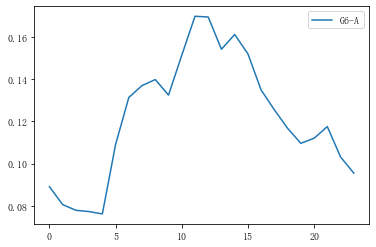

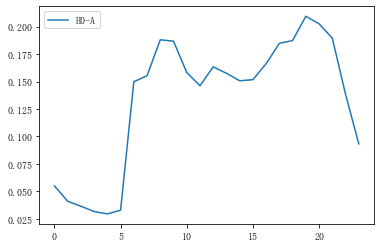

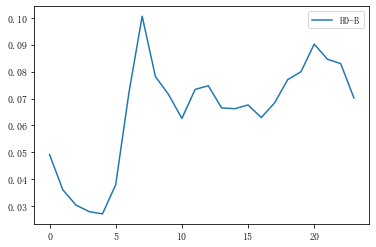

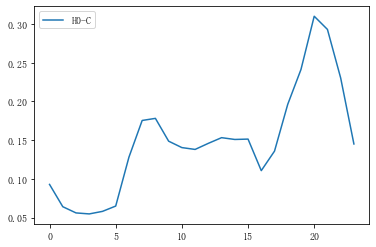

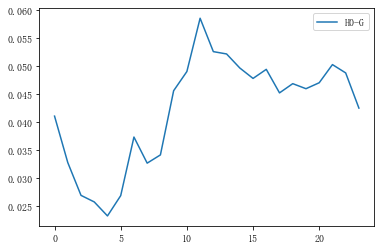

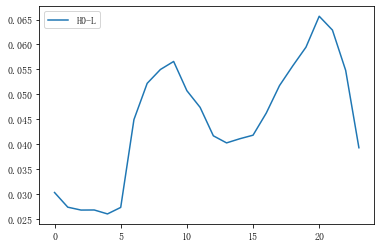

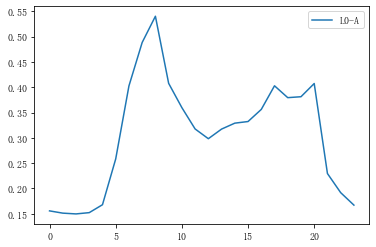

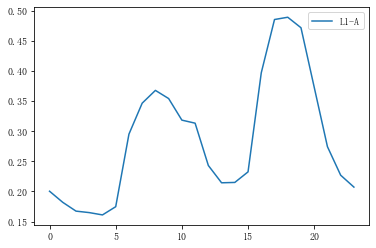

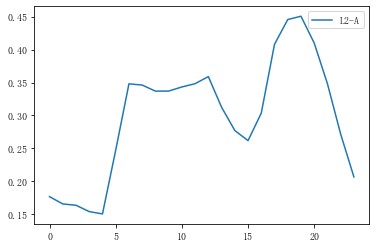

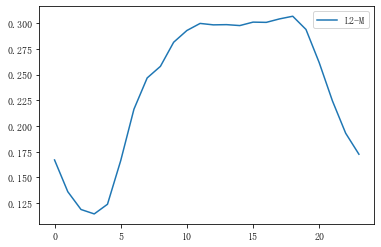

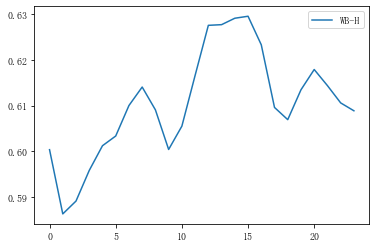

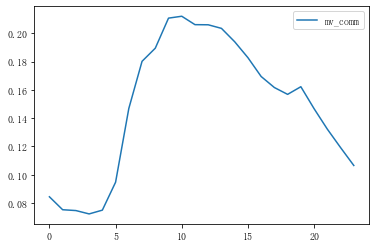

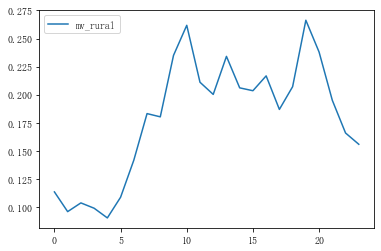

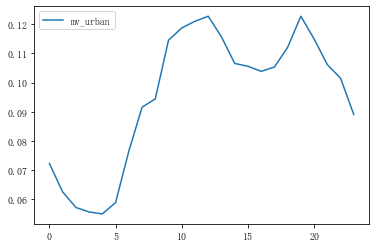

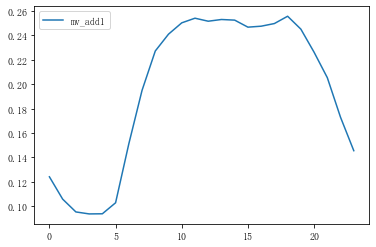

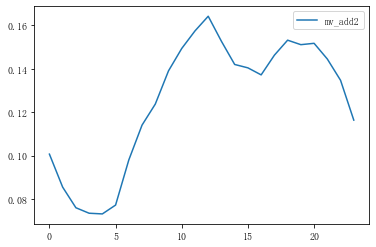

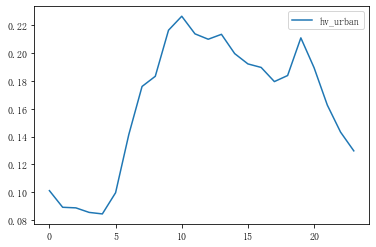

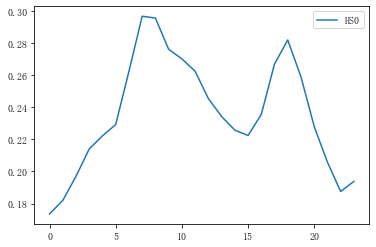

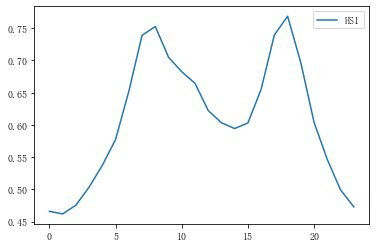

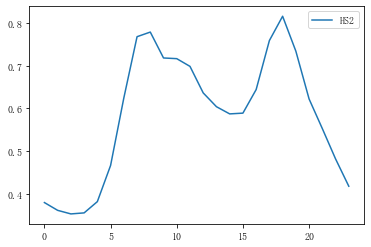

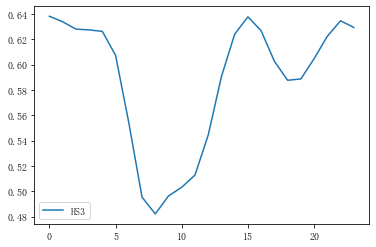

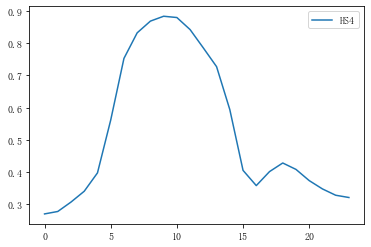

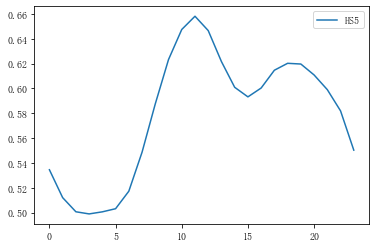

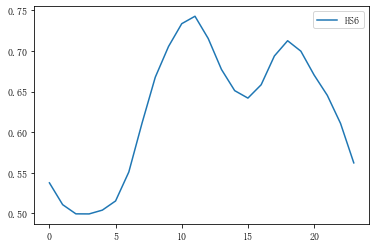

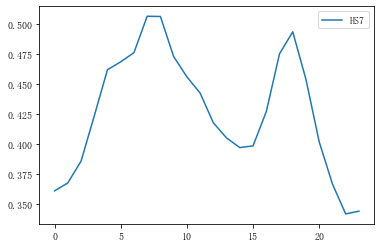

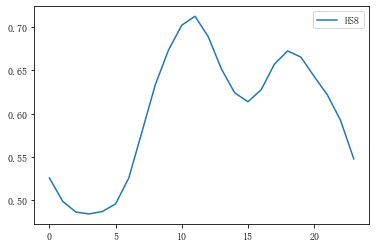

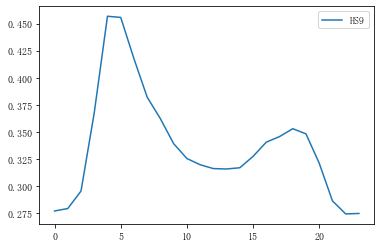

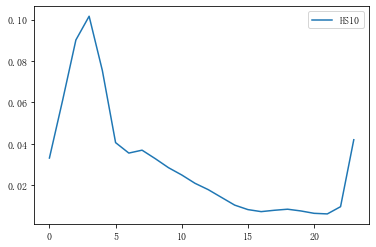

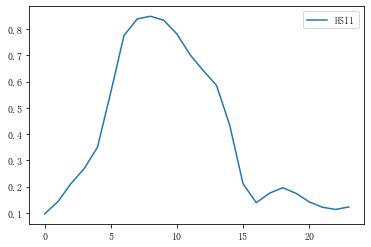

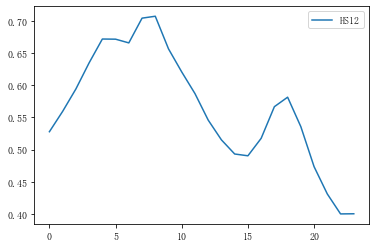

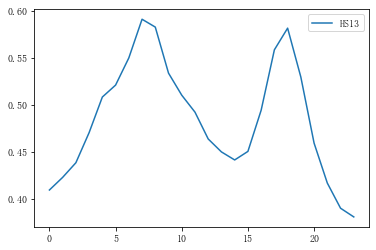

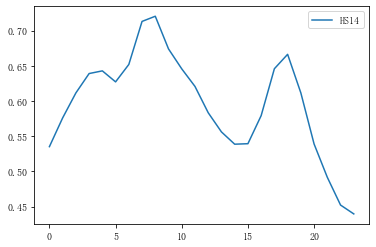

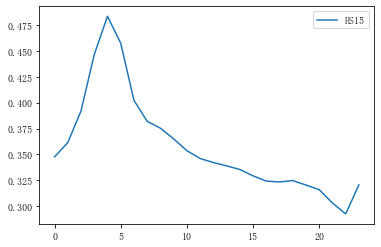

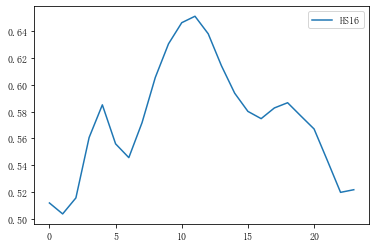

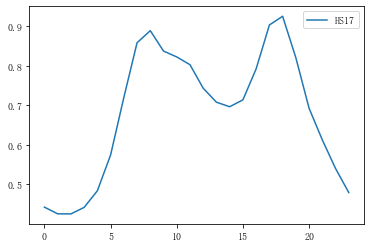

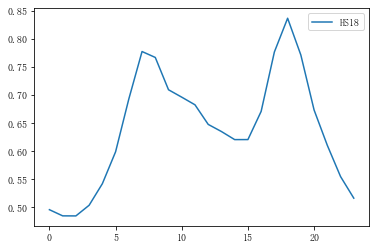

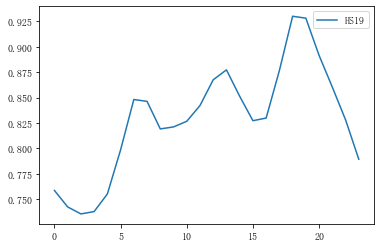

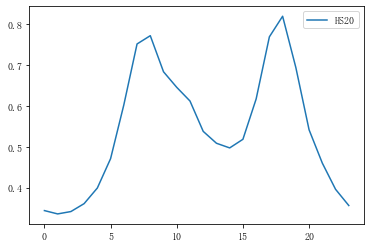

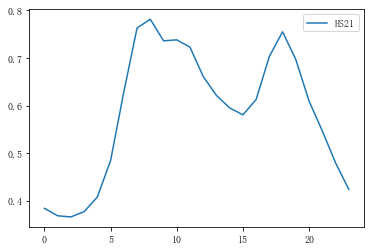

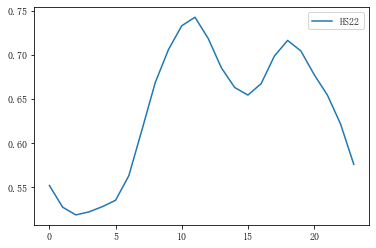

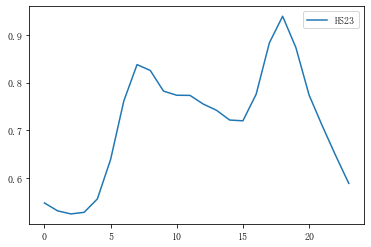

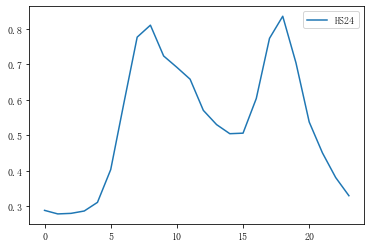

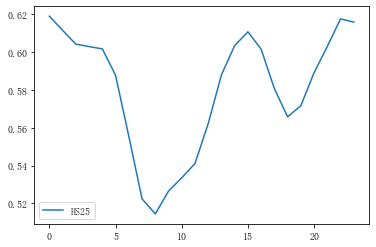

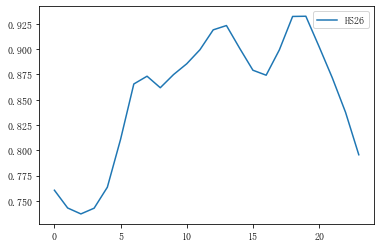

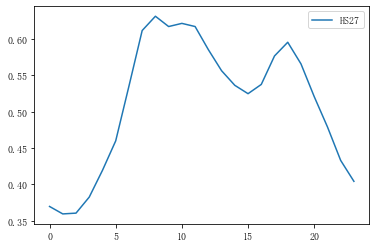

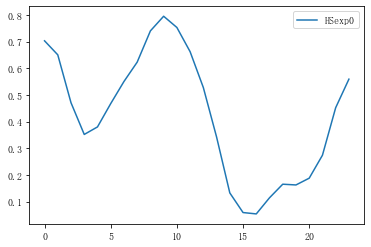

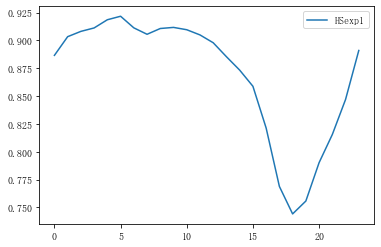

In [17]:
for key, v in typical_load.items():
    # print(key)
    fig, ax = plt.subplots()
    ax.plot(v['cent'][1,:], label=key)
    ax.legend()

In [17]:
available_load_profiles_names = [
'G0-A',
'G0-M',
'G1-A',
'G1-B',
'G1-C',
'G3-A',
'G3-H',
'G4-A',
'G5-A',
'L2-M']

available_wind_profiles_names = [
'WP1',
'WP3',
'WP7',
'WP10']

available_PV_profiles_names = [
'PV1',
'PV2',
'PV3',
'PV4',
'PV7',
'PV8']

In [18]:
available_load_profiles = {}
available_wind_profiles = {}
available_PV_profiles = {}
for name in available_load_profiles_names:
    available_load_profiles[name] = typical_load[name]

for name in available_wind_profiles_names:
    available_wind_profiles[name] = typical_wind[name]
    
for name in available_PV_profiles_names:
    available_PV_profiles[name] = typical_PV[name]



In [20]:
available_load_profiles['G0-A']['cent'].shape

(3, 24)

In [21]:
available_load_profiles['G0-A']['cent']

array([[0.21450906, 0.21221607, 0.21061943, 0.20761816, 0.2091347 ,
        0.25697692, 0.40996746, 0.5016323 , 0.60628807, 0.63932106,
        0.62484068, 0.5875679 , 0.58845732, 0.57244649, 0.54948645,
        0.53608341, 0.52864507, 0.49897492, 0.37301429, 0.26262054,
        0.2333964 , 0.22487964, 0.22563534, 0.22404527],
       [0.18723539, 0.18788443, 0.1861775 , 0.18285189, 0.18358026,
        0.18459875, 0.1834721 , 0.18267826, 0.18195659, 0.18473688,
        0.1855823 , 0.1855673 , 0.1868232 , 0.19041343, 0.19007057,
        0.19131437, 0.18974554, 0.18880303, 0.1873696 , 0.18601827,
        0.18909821, 0.19249091, 0.1916727 , 0.19039738],
       [0.22050234, 0.21608854, 0.21378099, 0.21233788, 0.21385576,
        0.21033979, 0.351351  , 0.48713876, 0.50763146, 0.50844356,
        0.51319318, 0.50621025, 0.50512416, 0.41677883, 0.28930567,
        0.22796747, 0.2061219 , 0.2003487 , 0.19442017, 0.18659987,
        0.18999276, 0.18499816, 0.18466946, 0.18429373]])

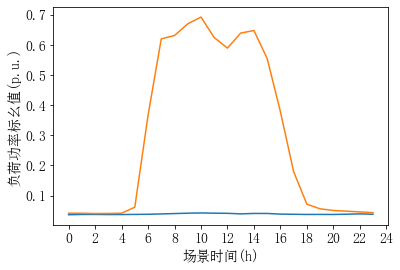

In [22]:
fig, ax = plt.subplots()
for idx, i in enumerate(available_load_profiles['G1-B']['cent']):
    if idx == 0:
        continue
    ax.plot(i)
    plt.xticks(ticks=range(0,26,2), fontsize=14)
    plt.yticks(fontsize=14)
    plt.xlabel(u'场景时间(h)', fontsize=14)
    plt.ylabel(u'负荷功率标幺值(p.u.)', fontsize=14)
    # fig.subplots_adjust(left=0.15)
    plt.savefig('负荷G1-B典型场景', dpi=300, bbox_inches='tight')

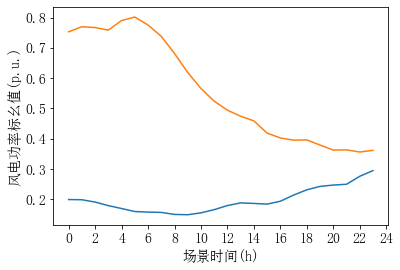

In [23]:
fig, ax = plt.subplots()
for idx, i in enumerate(available_wind_profiles['WP1']['cent']):
    if idx == 2:
        continue
    ax.plot(i)
    plt.xticks(ticks=range(0,26,2), fontsize=14)
    plt.yticks(fontsize=14)
    plt.xlabel(u'场景时间(h)', fontsize=14)
    plt.ylabel(u'风电功率标幺值(p.u.)', fontsize=14)
    # fig.subplots_adjust(left=0.15)
    plt.savefig('风电WP1典型场景', dpi=300, bbox_inches='tight')

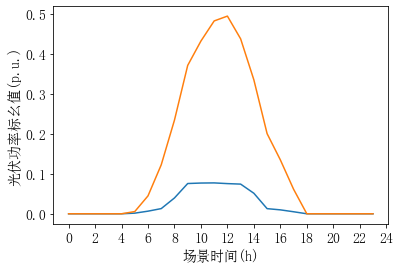

In [21]:
fig, ax = plt.subplots()
for idx, i in enumerate(available_PV_profiles['PV3']['cent']):
    if idx == 0:
        continue
    ax.plot(i)
    plt.xticks(ticks=range(0,26,2), fontsize=14)
    plt.yticks(fontsize=14)
    plt.xlabel(u'场景时间(h)', fontsize=14)
    plt.ylabel(u'光伏功率标幺值(p.u.)', fontsize=14)
    # fig.subplots_adjust(left=0.15)
    plt.savefig('光伏PV3典型场景', dpi=300, bbox_inches='tight')

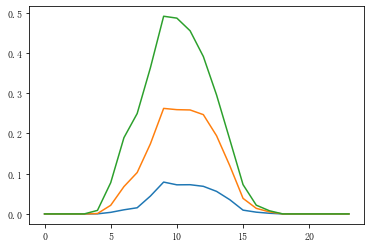

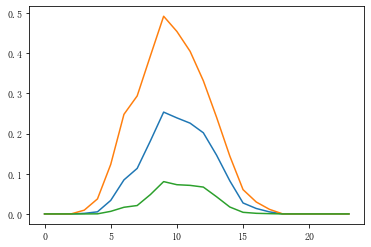

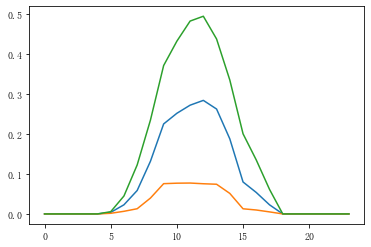

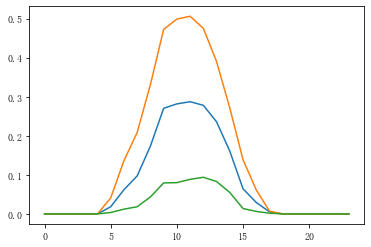

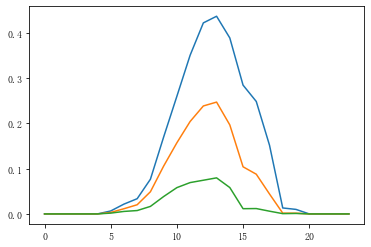

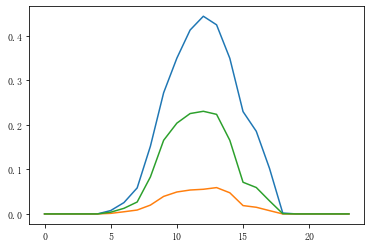

In [25]:
for name in available_PV_profiles.keys():
    fig, ax = plt.subplots()
    for i in available_PV_profiles[name]['cent']:
        ax.plot(i)

In [26]:
print(len(available_load_profiles))
print(len(available_wind_profiles))
print(len(available_PV_profiles))
print(2 ** 20)

10
4
6
1048576


In [27]:
net.load

bus  const_i_percent  const_z_percent  controllable  in_service  name  \
0     1              0.0              0.0         False        True  None   
1     2              0.0              0.0         False        True  None   
10   16              0.0              0.0         False        True  None   
11   17              0.0              0.0         False        True  None   
12   18              0.0              0.0         False        True  None   
13   19              0.0              0.0         False        True  None   
14   20              0.0              0.0         False        True  None   
15   22              0.0              0.0         False        True  None   
16   23              0.0              0.0         False        True  None   
17   25              0.0              0.0         False        True  None   
18   28              0.0              0.0         False        True  None   
19   29              0.0              0.0         False        True  None   
2     3              0.0              0.0         False        True  None   
3     6              0.0              0.0         False        True  None   
4     7              0.0              0.0         False        True  None   
5     9              0.0              0.0         False        True  None   
6    11              0.0              0.0         False        True  None   
7    13              0.0              0.0         False        True  None   
8    14              0.0              0.0         False        True  None   
9    15              0.0              0.0         False        True  None   

    p_mw  q_mvar  scaling  sn_mva  type  
0   21.7    12.7      1.0     NaN  None  
1    2.4     1.2      1.0     NaN  None  
10   9.0     5.8      1.0     NaN  None  
11   3.2     0.9      1.0     NaN  None  
12   9.5     3.4      1.0     NaN  None  
13   2.2     0.7      1.0     NaN  None  
14  17.5    11.2      1.0     NaN  None  
15   3.2     1.6      1.0     NaN  None  
16   8.7     6.7      1.0     NaN  None  
17   3.5     2.3      1.0     NaN  None  
18   2.4     0.9      1.0     NaN  None  
19  10.6     1.9      1.0     NaN  None  
2    7.6     1.6      1.0     NaN  None  
3   22.8    10.9      1.0     NaN  None  
4   30.0    30.0      1.0     NaN  None  
5    5.8     2.0      1.0     NaN  None  
6   11.2     7.5      1.0     NaN  None  
7    6.2     1.6      1.0     NaN  None  
8    8.2     2.5      1.0     NaN  None  
9    3.5     1.8      1.0     NaN  None

In [28]:
hash(((3,4), (5,)))

4237398543149902977

In [65]:
x = {'a':1, 'b':2}
x.update({'c':3})
x

{'a': 1, 'b': 2, 'c': 3}

In [74]:
class GridScenarios:
    def __init__(self, available_load_profiles, available_wind_profiles, available_PV_profiles, num_scenarios=100, stop_eps=1e-4):
        
        self.available_load_profiles = available_load_profiles
        self.available_wind_profiles = available_wind_profiles
        self.available_PV_profiles = available_PV_profiles
        
        self.available_load_profiles.update(self.available_wind_profiles)
        self.available_load_profiles.update(self.available_PV_profiles)
        
        self.num_scenarios = num_scenarios
        self.stop_eps = stop_eps
        
        self.forbidden_table = []
        
        self.M = 25
        self.M_Q = 16
        self.N_Q = self.M * 5
        
        
        self.index2value = {
                0:'G0-A',
                1:'G0-A',
                2:'G0-M',
                3:'G0-M',
                4:'G1-A',
                5:'G1-A',
                6:'G1-B',
                7:'G1-B',
                8:'G1-C',
                9:'G1-C',
                10:'G3-A',
                11:'G3-A',
                12:'G3-H',
                13:'G3-H',
                14:'G4-A',
                15:'G4-A',
                16:'G5-A',
                17:'G5-A',
                18:'L2-M',
                19:'L2-M',
                20:'WP1',
                21:'PV1',
                22:'PV2',
                23:'PV3',
                24:'PV4'
            }
    
        self.best_solution = self.generate_random_solution()
        self.forbidden_table.append(hash(self.best_solution))
        self.best_solution_score = self.compute_score(self.best_solution)
        
    
    def generate_random_solution(self):
        i = 0
        solution = []
        while i < self.num_scenarios:
            sce = self._generate_single_scenario()
            solution.append(sce)
            i += 1
                
        return tuple(solution)
    
    
    def _generate_single_scenario(self):
        return tuple(np.random.choice(range(3), size=25))
    
    
    def compute_score(self, solution):
        
        def compute_distance(scenario1, scenario2):
            # print(path1)
            # print(path2)
            # return np.sqrt((np.abs(path1 - path2) ** 2).sum())
            dist = []
            def compute_distance_between_path(path1, path2):
                return np.sqrt(((path1 - path2) ** 2).sum())
            
            for i in range(scenario1.shape[0]):
                dist.append(compute_distance_between_path(scenario1[i, :], scenario2[i, :]))
            return np.sqrt((np.array(dist) ** 2).sum())
        
        
        def get_prob(scenario):
            profile_names = list(map(lambda x: self.index2value[x], list(range(25))))
            
            log_probs = np.array(list(map(lambda x: np.log((self.available_load_profiles[profile_names[x]]['labels']==scenario[x]).sum() / \
                             len(self.available_load_profiles[profile_names[x]]['labels'])), list(range(25)))))
    
            prob = np.exp(log_probs.sum())
            return prob
        
        probs_ = np.array(list(map(get_prob, solution)))
        probs_sum = probs_.sum()
        probs = probs_ / probs_sum
        
        def get_distance(scenarios):
            profile_names = list(map(lambda x: self.index2value[x], list(range(25))))
            all_values = []
            for scenario in scenarios:
                this_values = np.array(list(map(lambda x: self.available_load_profiles[profile_names[x]]['cent'][scenario[x]], list(range(25)))))
                all_values.append(this_values)
                
            distances = []
            for values in all_values:
                distances.append(np.array(list(map(lambda x: compute_distance(values, x), all_values))).sum())
            
            return np.array(distances)
        
        distances = get_distance(solution)

        
        return (distances * probs).sum() / self.num_scenarios ** 2
        
    
    def update_solution(self):
        # generate N_Q candidate solutions
        def get_new_scenario_based_on_scenario_in_best_solution(scenario):
            new_scenario = np.array(scenario)
            new_scenario[np.random.choice(list(range(25)), self.M_Q)] = np.random.choice(range(3), size=self.M_Q)

            return tuple(new_scenario)
        
        def gen_new_solution_based_on_best_solution(solution):
            new_solution = []
            for scenario in solution:
                new_scenario = get_new_scenario_based_on_scenario_in_best_solution(scenario)
                new_solution.append(new_scenario)
                
            new_solution = tuple(new_solution)
            if hash(new_solution) in self.forbidden_table:
                new_solution = gen_new_solution_based_on_best_solution(solution)
            else:
                return new_solution
            
        i = 0
        new_solutions = []
        while i < self.N_Q:
            new_solution = gen_new_solution_based_on_best_solution(self.best_solution)
            new_solutions.append(new_solution)
            self.forbidden_table.append(hash(new_solution))
            i += 1      
        
        # compute the scores and update the best
        for new_solution in new_solutions:
            score = self.compute_score(new_solution)
            if score > self.best_solution_score:
                self.best_solution = new_solution
                self.best_solution_score = score
                
        return self.best_solution_score
        
    
    def get(self):
        result_logger = []
        result_logger.append(self.best_solution_score)
        for _ in range(8):
            cut = self.update_solution()
            print(cut)
            result_logger.append(cut)
            
        return result_logger

        
    
    

In [152]:
available_load_profiles['G0-A']['cent'][0].shape

(24,)

In [76]:
computer = GridScenarios(available_load_profiles, available_wind_profiles, available_PV_profiles, num_scenarios=100)
result_logger1 = computer.get()


0.046806542305972136
0.047902979747161546
0.047902979747161546
0.047902979747161546
0.047902979747161546
0.047902979747161546
0.047902979747161546
0.047902979747161546


In [77]:
computer = GridScenarios(available_load_profiles, available_wind_profiles, available_PV_profiles, num_scenarios=20)
result_logger2 = computer.get()


0.22800166755168405
0.2344379225911022
0.2362890273796823
0.2362890273796823
0.2362890273796823
0.24004225172654048
0.24004225172654048
0.24004225172654048


In [121]:
computer = GridScenarios(available_load_profiles, available_wind_profiles, available_PV_profiles, num_scenarios=50)
result_logger3 = computer.get()


0.09274432385850966
0.09331394449415564
0.0946159586002972
0.09486483754084991
0.09486483754084991
0.09486483754084991
0.09486483754084991
0.09718881376469095


In [171]:
available_load_profiles.update(available_wind_profiles)
available_load_profiles.update(available_PV_profiles)

In [175]:
computer.best_solution
index2value = {
        0:'G0-A',
        1:'G0-A',
        2:'G0-M',
        3:'G0-M',
        4:'G1-A',
        5:'G1-A',
        6:'G1-B',
        7:'G1-B',
        8:'G1-C',
        9:'G1-C',
        10:'G3-A',
        11:'G3-A',
        12:'G3-H',
        13:'G3-H',
        14:'G4-A',
        15:'G4-A',
        16:'G5-A',
        17:'G5-A',
        18:'L2-M',
        19:'L2-M',
        20:'WP1',
        21:'PV1',
        22:'PV2',
        23:'PV3',
        24:'PV4'
    }
solution_data = []
for scenario in computer.best_solution:
    scenario_data = {}
    for i, path_name in enumerate(scenario):
        scenario_data[index2value[i]] = available_load_profiles[index2value[i]]['cent'][path_name]
    
    solution_data.append(pd.DataFrame(scenario_data))

In [186]:
with open('typical_scenario.txt', 'wb') as file:
    pickle.dump(solution_data, file)
# with open('typical_scenario.txt', 'rb') as file:
#     test = pickle.load(file)

In [185]:
test

[        G0-A      G0-M      G1-A      G1-B      G1-C      G3-A      G3-H  \
 0   0.220502  0.246898  0.038630  0.036395  0.032675  0.349834  0.664816   
 1   0.216089  0.244437  0.038024  0.037320  0.032489  0.364230  0.652520   
 2   0.213781  0.243473  0.037421  0.037347  0.032516  0.369147  0.642382   
 3   0.212338  0.242135  0.036614  0.037006  0.032185  0.351793  0.651896   
 4   0.213856  0.242615  0.036032  0.037069  0.033126  0.357069  0.697310   
 5   0.210340  0.244462  0.040598  0.037428  0.034581  0.374385  0.711017   
 6   0.351351  0.281843  0.112546  0.037940  0.042572  0.385861  0.712618   
 7   0.487139  0.418565  0.380311  0.039053  0.051357  0.438499  0.712874   
 8   0.507631  0.590178  0.554508  0.040266  0.052226  0.499368  0.721864   
 9   0.508444  0.633008  0.607333  0.041541  0.053763  0.533201  0.733720   
 10  0.513193  0.675347  0.613993  0.042349  0.052855  0.574411  0.744318   
 11  0.506210  0.678295  0.614010  0.041451  0.052254  0.590424  0.750105   

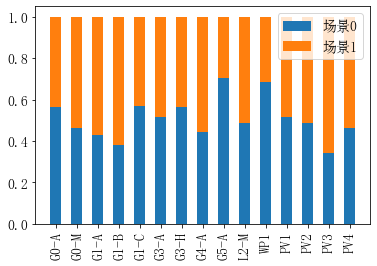

In [174]:
labels = ['G0-A',
            'G0-M',
            'G1-A',
            'G1-B',
            'G1-C',
            'G3-A',
            'G3-H',
            'G4-A',
            'G5-A',
            'L2-M',
            'WP1',
            'PV1',
            'PV2',
            'PV3',
            'PV4']

scenario_result = np.array(computer.best_solution)
first = []
second = []
third = []
for i in range(scenario_result.shape[1]):
    cnt_0 = (scenario_result[:, i] == 0).sum()
    cnt_1 = (scenario_result[:, i] == 1).sum()
    cnt_2 = (scenario_result[:, i] == 2).sum()
    first.append(cnt_0)
    second.append(cnt_1)
    third.append(cnt_2)
first = first[10:]
second = second[10:]
data = [first, second]

x = range(len(labels))

width = 0.5

# 将bottom_y元素都初始化为0

bottom_y = np.zeros(len(labels))

data = np.array(data)

# 按列计算计算每组柱子的总和，为计算百分比做准备

sums = np.sum(data, axis=0)
labelss = ['场景0', '场景1']
for i, label in zip(data, labelss):

# 计算每个柱子的高度，即百分比

    y = i / sums

    plt.bar(x, y, width, bottom=bottom_y, label=label)

# 计算bottom参数的位置

    bottom_y = y + bottom_y

plt.xticks(x, labels, fontsize=14, rotation='vertical')
plt.yticks(fontsize=14)
plt.legend(fontsize=14)

plt.savefig('各节点场景对应概率', dpi=300, bbox_inches='tight')

plt.show()

In [89]:
result_logger1 = [0.046806542305972136,
0.047902979747161546,
0.047902979747161546,
0.047902979747161546]
result_logger3 = [0.0947163474437474,
0.09680801571209204,
0.09680801571209204,
0.09704302686419033,
0.09704302686419033,
0.09704302686419033]

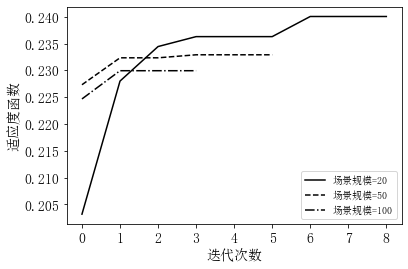

In [116]:
fig, ax = plt.subplots()
ax.plot(np.array(result_logger2), 'k', label='场景规模=20')
ax.plot(np.array(result_logger3) * 2.4, 'k--', label='场景规模=50')
ax.plot(np.array(result_logger1) * 4.8, 'k-.', label='场景规模=100')
plt.legend(loc='lower right')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel(u'迭代次数', fontsize=14)
plt.ylabel(u'适应度函数', fontsize=14)
# fig.subplots_adjust(left=0.15)
plt.savefig('适应度函数训练曲线', dpi=300, bbox_inches='tight')